AUC: 1.0


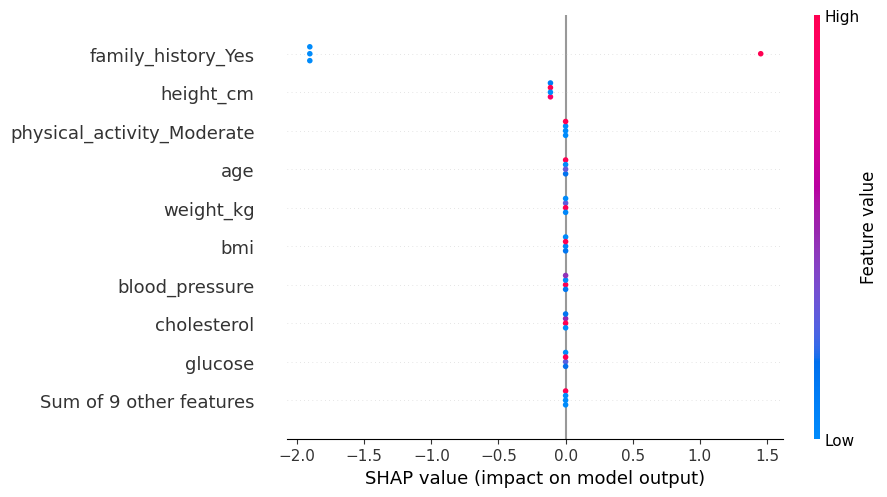

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import shap

df = pd.read_csv('../data/synthetic_patients.csv')

# Handle categorical variables with one-hot encoding
categorical_cols = ['gender', 'ethnicity', 'smoking_status', 'diabetes_status', 'physical_activity', 'family_history']
for col in categorical_cols:
    df[col] = df[col].astype('category')

X = pd.get_dummies(df.drop(columns=['cardio_risk']), drop_first=True)
y = df['cardio_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred))

# SHAP explainability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)
